# GRIP @ The Sparks Foundation - Data Science and Business Analytics

# Task 1: Prediction using Supervised Machine Learning

### Author: Abijith P

## Objective:

Predict the percentage of an student based on the number of hours they study per day using Simple Linear Regression technique on the student marks dataset. Also predict the score if a student studies for 9.25 hrs/ day? 

### Importing all the required libraries:


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#Importing all the required packages 

### Loading the dataset


In [16]:
data = pd.read_csv("http://bit.ly/w-data") #Importing data using remote link
data.head(11)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Feature Exploration

In [17]:
data.shape

(25, 2)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


From the above output, we can see that there is no missing values in the dataset.

In [19]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


 From the above table, we can observe that the average study hours of the student is 5.01 hours and the average scores of the student is 51.48


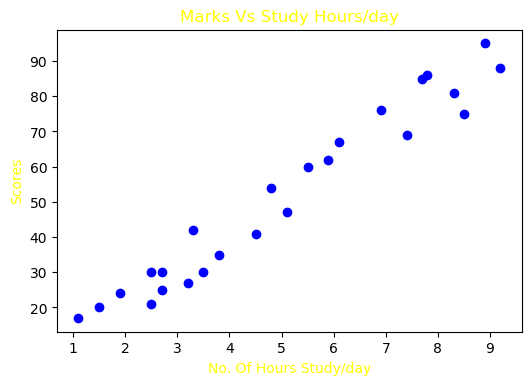

In [27]:
## Plotting Scatter plot between the response vaiable and the exploratory variable

plt.figure(dpi=100)
plt.scatter(data['Hours'],data['Scores'],color = "blue")
plt.title("Marks Vs Study Hours/day",color = "yellow")
plt.xlabel("No. Of Hours Study/day",color = "yellow")
plt.ylabel("Scores",color = "yellow");

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [28]:
## Pearson Correlation

correlations = data.corr(method='pearson')
print(correlations)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


From the above plot and matrix, we can see that there is a highly positive linear correlation betweeen the 2 variables. So we can conclude that, the when the no. of study hours increases the percentage scores will also increase.

### Data Preparation

In [49]:
## Convert the data into array type

X = data.iloc[:, :-1]       #attributes
y = data.iloc[:,1].values   #labels

In [70]:
## SPlit data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=50)

### Model Building


In [71]:
## Training the algorithm

lr = LinearRegression()
lr.fit(X_train,y_train)

print("Coefficient:", lr.coef_)
print("Intercept  :", lr.intercept_)

Coefficient: [9.62160558]
Intercept  : 3.0397190483256935


Here the model equation is,
#### Scores = 3.0397 + 9.62160 * (Hours)

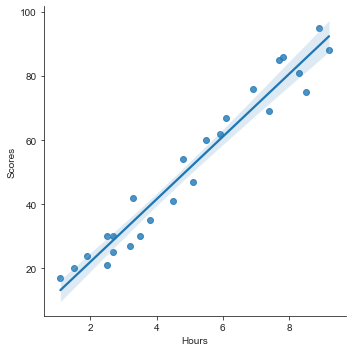

In [72]:
## Plotting the Regression Line

sns.lmplot("Hours","Scores", data)
sns.set_style("ticks");

### Scoring

In [73]:
y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

## Comparing Actual vs Predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})  
df

,Actual,Predicted
0,95,88.672009
1,30,29.018054
2,76,69.428798
3,35,39.601820
4,17,13.623485
5,41,46.336944
6,81,82.899045


### Model Evaluation For Train Data 

In [74]:
print ('R2 score           :', round(r2_score(y_train, y_pred_train),5))
print ('Mean Squared Error :', round(mean_squared_error(y_train, y_pred_train),5))
print ('Mean absolute Error:', round(mean_absolute_error(y_train, y_pred_train),5))

R2 score           : 0.94183
Mean Squared Error : 32.11258
Mean absolute Error: 5.26526


### Model Evaluation For Test Data 

In [75]:
print ('R2 score           :', round(r2_score(y_test, y_pred_test),5))
print ('Mean Squared Error :', round(mean_squared_error(y_test, y_pred_test),5))
print ('Mean absolute Error:', round(mean_absolute_error(y_test, y_pred_test),5))

R2 score           : 0.97227
Mean Squared Error : 21.26505
Mean absolute Error: 4.15649


### Model validation

In [77]:
df1 = pd.DataFrame({'R2 score': [0.94183,0.97227],'Mean Squared Error': [32.11258,21.26505],'Mean absolute Error':[5.26526,4.15649]},index = ['Train','Test'])  
df1

,R2 score,Mean Squared Error,Mean absolute Error
Train,0.94183,32.11258,5.26526
Test,0.97227,21.26505,4.15649


### Predicting the score if a student studies for 9.25 hrs/ day


In [78]:
test_x = [[9.25]] # X has to be a 2-D array

print(f"Predicted Score, When a student studies {test_x[0][0]} hours per day is equal to", round(lr.predict(test_x)[0],2))

Predicted Score, When a student studies 9.25 hours per day is equal to 92.04


## Conclusion:

1. The model equation built to predict the Scores of the students is, Scores = 3.0397 + 9.62160 * (Hours)
2. From the estimated co-efficients, we can conclude that, when the study hour per day increases by 1 unit then the marks increases by 9.62160 units.
3. Here, the R-squared value is 0.97227, which indicates that 97.2% of the variance of the dependent variable (Scores) is explained by the variance of the independent variable (Study_hours/day).
4. If a student studeis for 9.25 hours/day, then the predicted score is equals to 92.04
5. Since the mean absolute error has small difference between the train and test dataset, we can conclude that themodel has good predictive power.